# Scatter Plot With Best Fit Line

### Step 1 : Initialize Global Setting

In [1]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the params
large = 22
med =16
small= 12

params = {
    'axes.titlesize':large,
    'legend.fontsize':med,
    'figure.figsize':(16,10),
    'axes.labelsize':med,
    'xtick.labelsize':med,
    'ytick.labelsize':med,
    'figure.titlesize':large
    
}

#override default parameters of plot

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

### Step 2 :  Import dataset 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/mukesh-ranjan/LearnDataAnalysisFromScratch/master/Data/mpg.csv")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### Step 3 : Prepare Data

In [5]:
dfs=df.loc[df.cyl.isin([4,8]),:]
dfs

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


### Step 4 : Draw Plot

Text(0.5, 1, 'Scatterplot with line of best fit grouped by number of cylinders')

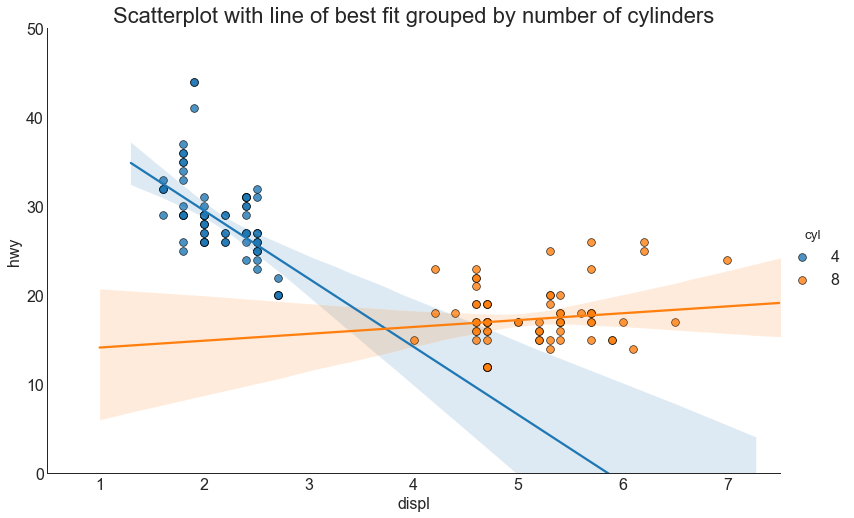

In [6]:
sns.set_style("white")
plotobj=sns.lmplot(x="displ",y="hwy",hue="cyl",data=dfs,height=7, aspect=1.6, robust=True, palette='tab10', scatter_kws=dict(s=60,linewidths=.7,edgecolors='black'))

plotobj.set(xlim=(0.5,7.5),ylim=(0,50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders",fontsize=large)


### Step 5 : Decorate Plots with Right Labels